In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tensorflow.keras.utils import to_categorical

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from tqdm import tqdm

import random
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [2]:
raw = pd.read_csv('D:\\FULL LENDING CLUB DATASET\\fulldata2007-2019.csv', index_col = 0) # , index_col = 0

print(raw.iloc[0,:])

C:\Users\mznid\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,20,50,60,119,130,131,132,135,136,137,140,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\mznid\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


id                       1077501
member_id                    NaN
loan_amnt                   5000
funded_amnt                 5000
funded_amnt_inv             4975
                          ...   
settlement_status            NaN
settlement_date              NaN
settlement_amount            NaN
settlement_percentage        NaN
settlement_term              NaN
Name: 0, Length: 150, dtype: object


In [3]:
with pd.option_context('display.max_rows', 150):
     print(raw.isnull().sum().sort_values(ascending = False))
     raw.isnull().sum().sort_values(ascending = False).to_csv('lendingclubnullcount.csv')

with pd.option_context('display.max_rows', 150):
    print(raw.iloc[0,:])


def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    print(freq)

print(CountFrequency(list(raw.loc[:,'loan_status'])))

member_id                                     2778816
orig_projected_additional_accrued_interest    2767508
hardship_amount                               2764406
hardship_type                                 2764406
hardship_reason                               2764406
hardship_status                               2764406
deferral_term                                 2764406
hardship_last_payment_amount                  2764406
hardship_payoff_balance_amount                2764406
hardship_loan_status                          2764406
hardship_dpd                                  2764406
hardship_length                               2764406
payment_plan_start_date                       2764406
hardship_end_date                             2764406
hardship_start_date                           2764406
settlement_term                               2728500
settlement_percentage                         2728500
debt_settlement_flag_date                     2728500
settlement_status           

C:\Users\mznid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


id                                                                                      1077501
member_id                                                                                   NaN
loan_amnt                                                                                  5000
funded_amnt                                                                                5000
funded_amnt_inv                                                                            4975
term                                                                                  36 months
int_rate                                                                                 10.65%
installment                                                                              162.87
grade                                                                                         B
sub_grade                                                                                    B2
emp_title                               

Name: 0, dtype: object
{'Fully Paid': 1436688, 'Charged Off': 350217, nan: 41, 'Does not meet the credit policy. Status:Fully Paid': 1988, 'Does not meet the credit policy. Status:Charged Off': 761, 'Current': 942153, 'Late (31-120 days)': 20265, 'In Grace Period': 19974, 'Late (16-30 days)': 6198, 'Default': 531}
None


In [4]:
features = raw.loc[:,["annual_inc" 
    ,'loan_amnt' 
    ,'int_rate'
    ,'installment'
    ,'grade', 'sub_grade'
    ,'term'
    ,'fico_range_low', 'fico_range_high'      # drop high?
                          ,'home_ownership'
                          ,'loan_status'  #?  # IS THIS THE SAME AS revStatus ?
                          ,'acc_open_past_24mths'
                          ,'num_actv_rev_tl'
                          ,'tot_cur_bal'
                          ,'inq_last_6mths'
                          ,'initial_list_status'
                          
                          ,'total_acc'
                          ,'total_bc_limit' 
                          ,'earliest_cr_line'
                          #,'revol_util'
                          
                          ,'tot_hi_cred_lim'
                          ,'total_il_high_credit_limit'
                          ,'num_actv_bc_tl'
                          ,'num_bc_tl'
                          ,'mo_sin_rcnt_tl'
                          
                          ,'delinq_2yrs'
                          ,'dti']]

In [5]:
with pd.option_context('display.max_rows', 150):
     print(features.isnull().sum().sort_values(ascending = False))

num_actv_rev_tl               70317
tot_cur_bal                   70317
mo_sin_rcnt_tl                70317
num_bc_tl                     70317
num_actv_bc_tl                70317
total_il_high_credit_limit    70317
tot_hi_cred_lim               70317
acc_open_past_24mths          50071
total_bc_limit                50071
dti                            2897
inq_last_6mths                   71
total_acc                        70
delinq_2yrs                      70
earliest_cr_line                 70
annual_inc                       45
initial_list_status              41
loan_status                      41
home_ownership                   41
fico_range_high                  41
fico_range_low                   41
term                             41
sub_grade                        41
grade                            41
installment                      41
int_rate                         41
loan_amnt                        41
dtype: int64


In [6]:
del raw

In [7]:
features = features.dropna()

print(CountFrequency(list(features.loc[:,'loan_status'])))

{'Fully Paid': 1378712, 'Charged Off': 339699, 'Current': 940364, 'Late (31-120 days)': 20226, 'In Grace Period': 19929, 'Late (16-30 days)': 6183, 'Default': 529}
None


In [8]:
print(features.iloc[0,:])

annual_inc                         90000
loan_amnt                          11100
int_rate                          14.98%
installment                       384.68
grade                                  C
sub_grade                             C3
term                           36 months
fico_range_low                       690
fico_range_high                      694
home_ownership                  MORTGAGE
loan_status                   Fully Paid
acc_open_past_24mths                   2
num_actv_rev_tl                        8
tot_cur_bal                       353402
inq_last_6mths                         0
initial_list_status                    f
total_acc                             12
total_bc_limit                      4000
earliest_cr_line                Jun-2001
tot_hi_cred_lim                   385000
total_il_high_credit_limit             0
num_actv_bc_tl                         4
num_bc_tl                              4
mo_sin_rcnt_tl                        11
delinq_2yrs     

In [9]:
notcurrentindex = []
for ind,each in enumerate(features.loc[:,'loan_status']):
    if each not in ['Current' , 'Late (31-120 days)' , 'In Grace Period' , 'Late (16-30 days)']:
        notcurrentindex.append(ind)

features = features.iloc[notcurrentindex,:]

print(features.iloc[0,:])

annual_inc                         90000
loan_amnt                          11100
int_rate                          14.98%
installment                       384.68
grade                                  C
sub_grade                             C3
term                           36 months
fico_range_low                       690
fico_range_high                      694
home_ownership                  MORTGAGE
loan_status                   Fully Paid
acc_open_past_24mths                   2
num_actv_rev_tl                        8
tot_cur_bal                       353402
inq_last_6mths                         0
initial_list_status                    f
total_acc                             12
total_bc_limit                      4000
earliest_cr_line                Jun-2001
tot_hi_cred_lim                   385000
total_il_high_credit_limit             0
num_actv_bc_tl                         4
num_bc_tl                              4
mo_sin_rcnt_tl                        11
delinq_2yrs     

In [10]:
iddict = {}
for each in features.loc[:,'loan_status']:
    if each not in iddict:
        iddict[each] = len(iddict)

# discretize manual override
iddict = {'Fully Paid': 0, 'Charged Off': 1, 'Default': 1}

loan_status = [iddict[i] for i in features.loc[:,'loan_status']]

features.loc[:,'loan_status'] = pd.Series(loan_status, index = features.index)

In [11]:
# string date to year number

date = []
for each in features.loc[:,'earliest_cr_line']:
    date.append(int(each[4:]))

features.loc[:,'earliest_cr_line'] = pd.Series(date, index = features.index)


# ordinal

iddict = {}
for each in features.loc[:,'grade']:
    if each not in iddict:
        iddict[each] = len(iddict)

        
# manual override for ordinal
iddict = {'G': 0, 'F': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6}

grade = [iddict[i] for i in features.loc[:,'grade']]

features.loc[:,'grade'] = pd.Series(grade, index = features.index)


# ordinal

iddict = {}
for each in features.loc[:,'sub_grade']:
    if each not in iddict:
        iddict[each] = len(iddict)

iddict = {k:i for i,k in enumerate(sorted(iddict.keys(),reverse = True))}

sub_grade = [iddict[i] for i in features.loc[:,'sub_grade']]

features.loc[:,'sub_grade'] = pd.Series(sub_grade, index = features.index)


# 6 classes

iddict = {}
for each in features.loc[:,'home_ownership']:
    if each not in iddict:
        iddict[each] = len(iddict)

home_ownership = [iddict[i] for i in features.loc[:,'home_ownership']]

home_ownershipdf = pd.DataFrame(to_categorical(home_ownership), columns = ['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], index = features.index)

features = features.drop(columns=['home_ownership'])


# BINARY

iddict = {}
for each in features.loc[:,'initial_list_status']:
    if each not in iddict:
        iddict[each] = len(iddict)

initial_list_status = [iddict[i] for i in features.loc[:,'initial_list_status']]

features.loc[:,'initial_list_status'] = pd.Series(initial_list_status, index = features.index)


# BINARY

iddict = {}
for each in features.loc[:,'term']:
    if each not in iddict:
        iddict[each] = len(iddict)

term = [iddict[i] for i in features.loc[:,'term']]

features.loc[:,'term'] = pd.Series(term, index = features.index)


# Combine One-Hots with Main Feature DF

features = pd.concat([features, home_ownershipdf], axis = 1) # , ignore_index = True


# Combine 

int_rate_convert = []
for each in features.loc[:, 'int_rate']:
    int_rate_convert.append(each.replace('%',''))

features.loc[:, 'int_rate'] = pd.Series(int_rate_convert, index = features.index)

In [12]:
labels = features.loc[:,'loan_status']

features = features.drop(columns = ['loan_status'])

In [13]:
features = features.iloc[list(set(range(0,len(features))) - set([1387322])),:]    # drop that millionaire/liar

scaler = MinMaxScaler()
#scaler = StandardScaler()
X = scaler.fit_transform(features)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:07<00:00, 26.27s/it]


Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

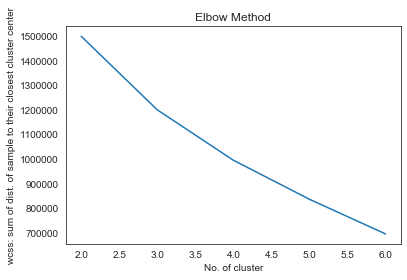

In [18]:
wcss = []

for k in tqdm(range(2,7)):
    kmeans = KMeans(n_clusters = k , init = 'k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,7), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [14]:
kmeans_1 = KMeans(n_clusters=3)
kmeans_1.fit(X)
cluster_pred = kmeans_1.predict(X)
cluster_pred_2 = kmeans_1.labels_
cluster_center = kmeans_1.cluster_centers_

([<matplotlib.axis.XTick at 0x20d95f97c50>,
 <a list of 20 Text xticklabel objects>)

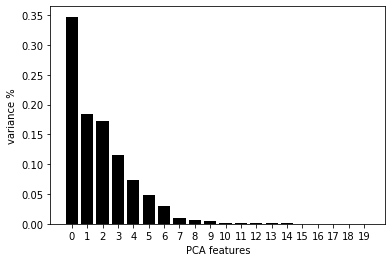

In [15]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)

pcafeatures = range(pca.n_components_)
plt.bar(pcafeatures, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(pcafeatures)

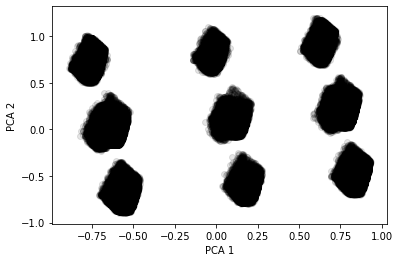

In [16]:
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# TRANSFORM CENTROIDS
pcacenters = pca.transform(cluster_center)

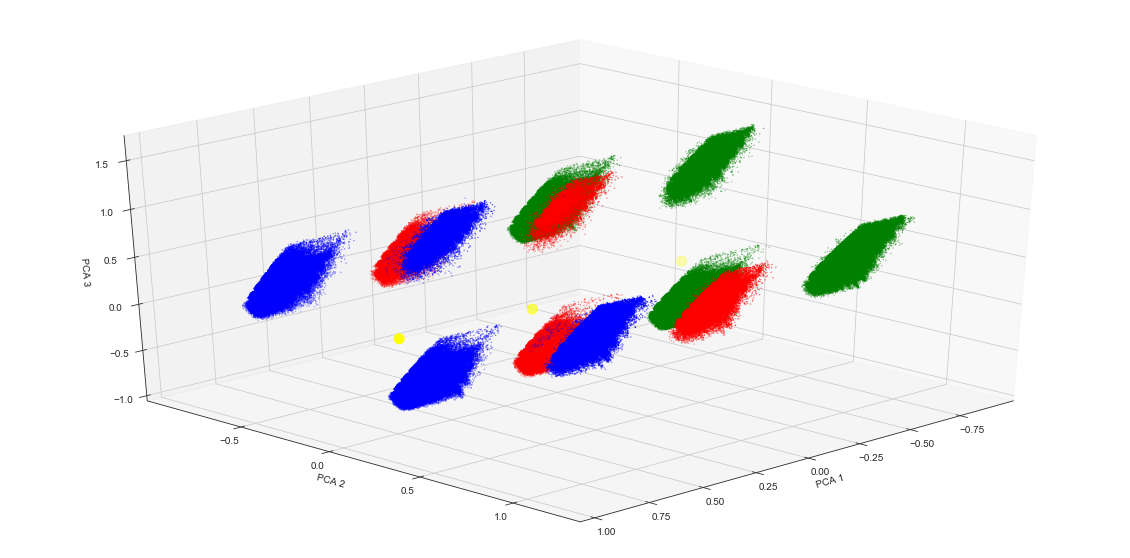

In [17]:
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_components[0][cluster_pred==0],PCA_components[1][cluster_pred==0], PCA_components[2][cluster_pred==0], s = 0.1, c = 'red', label ='cluster 1' )
ax.scatter(PCA_components[0][cluster_pred==1],PCA_components[1][cluster_pred==1], PCA_components[2][cluster_pred==1], s = 0.1, c = 'blue', label ='cluster 2' )
ax.scatter(PCA_components[0][cluster_pred==2],PCA_components[1][cluster_pred==2], PCA_components[2][cluster_pred==2], s = 0.1, c = 'green', label ='cluster 3' )
#ax.scatter(PCA_components[0][cluster_pred==3],PCA_components[1][cluster_pred==3], PCA_components[2][cluster_pred==3], s = 1, c = 'cyan', label = 'cluster 4')
#ax.scatter(PCA_components[0][cluster_pred==4],PCA_components[1][cluster_pred==4], PCA_components[2][cluster_pred==4], s = 1, c = 'magenta', label = 'cluster 5')
#ax.scatter(PCA_components[0][cluster_pred==5],PCA_components[1][cluster_pred==5], PCA_components[2][cluster_pred==5], s = 1, c = '#66023C', label = 'cluster 6')
ax.scatter(pcacenters[:,0],pcacenters[:,1],pcacenters[:,2], s = 100, c = 'yellow', label = 'Centroids')

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel('PCA 3')
ax.view_init(30, 45)
plt.show()

Text(412.0, 0.5, 'Cluster')

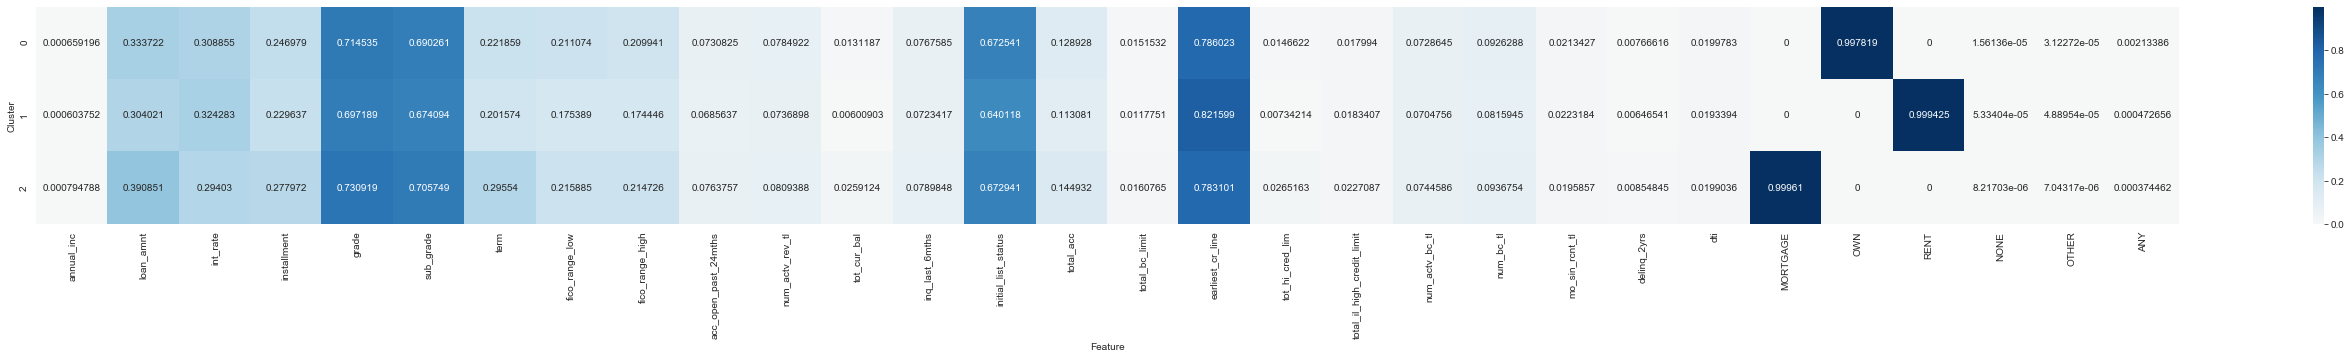

In [19]:
cluster0 = X[cluster_pred==0]
cluster1 = X[cluster_pred==1]
cluster2 = X[cluster_pred==2]
#cluster3 = X[cluster_pred==3]
#cluster4 = X[cluster_pred==4]
#cluster5 = X[cluster_pred==5]

clusterlist = [cluster0,cluster1,cluster2] #,cluster3,cluster4,cluster5

clusterlengths = []
for each in clusterlist:
    clusterlengths.append(len(each))

clustermeans = []
for each in clusterlist:
    clustermeans.append(np.mean(each, axis = 0))

sidebyside = pd.DataFrame(columns = features.columns)
for each in clustermeans:
    sidebyside = sidebyside.append(pd.Series(each,index = features.columns), ignore_index = True)   # I don't know why we have to go index-to-columns... seems counterintuitive?

fig, ax = plt.subplots(figsize=(48,4)) 
sns.heatmap(sidebyside, annot = True, cmap = "RdBu", fmt='g', ax=ax,  center= 0)
plt.xlabel('Feature')
plt.ylabel('Cluster')


In [20]:
# Downsample by artificially balancing dataset, looks like 1362818 good loans to only 336182 bad loans

print(CountFrequency(list(labels)))

labels = np.array(labels)


defaultindex = []
for ind,each in enumerate(labels):
    if each == 1:
        defaultindex.append(ind)

selectionpool = defaultindex + list(random.sample(list(set(range(0,len(X))) - set(defaultindex)), len(defaultindex)))


trainindex = random.sample(selectionpool, round(0.9 * len(selectionpool)))
testindex = list( set(selectionpool) - set(trainindex))


train = X[trainindex]
test = X[testindex]
labeltrain = labels[trainindex]
labeltest = labels[testindex]

{0: 1378712, 1: 340228}
None


0.623666343355965


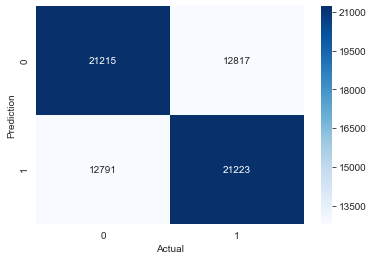

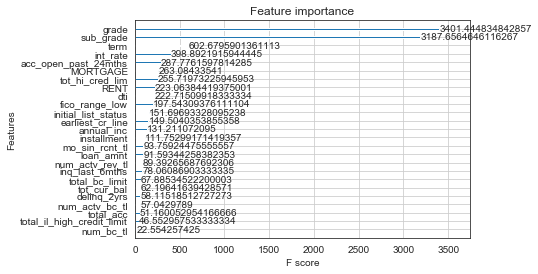

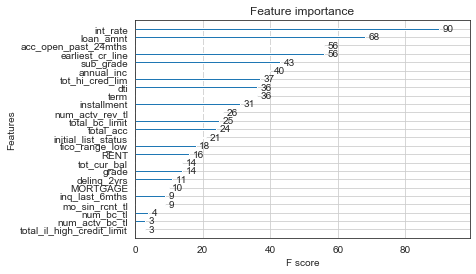

In [21]:
train = pd.DataFrame(train, columns = features.columns)
test = pd.DataFrame(test, columns = features.columns)


XGBmodel = XGBClassifier()
XGBmodel.fit(train, labeltrain)
preds = XGBmodel.predict(test)


cf = pd.crosstab(preds, labeltest)

sns.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')


xgb.plot_importance(XGBmodel, importance_type = 'gain')

print(XGBmodel.score(test,labeltest))


xgb.plot_importance(XGBmodel, importance_type = 'weight')

In [ ]:
'''
RFmodel = RandomForestClassifier(n_estimators = 100)
RFmodel.fit(train, labeltrain)
preds = RFmodel.predict(test)

cf = pd.crosstab(preds, labeltest)

sns.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')


print(RFmodel.score(test,labeltest))
'''